<a href="https://colab.research.google.com/github/gitarshmah/Boolean_Gang/blob/main/Maruti_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36085 sha256=8cafa43cb5f205c81f59a330e895f1f5ea7031c59bb9d85b6eab526f04bba035
  Stored in directory: /root/.cache/pip/wheels/b9/2c/cb/d74199e422a1dbc20297d10cfff9c54d03e0b5c6694d49ccdd
Successfully built nsepy


In [2]:
import nsepy as nse
import datetime
from datetime import date as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly as py

In [3]:
comp_symbol = 'MARUTI'

## Load Dataset

In [4]:
today = dt.today()
two_yrs = today - datetime.timedelta(days = int(2.5*365))

In [5]:
#Load dataset
stock = nse.get_history(symbol=comp_symbol, index = False, start=two_yrs, end=today)

In [6]:
stock

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-08-12,MARUTI,EQ,6649.20,6609.95,6778.05,6592.10,6730.05,6730.30,6708.04,1114994,7.479428e+14,76689,211836,0.1900
2020-08-13,MARUTI,EQ,6730.30,6729.95,6772.00,6655.00,6732.00,6731.65,6720.91,1087096,7.306279e+14,82991,135660,0.1248
2020-08-14,MARUTI,EQ,6731.65,6740.00,6745.15,6552.05,6598.95,6588.20,6637.52,905798,6.012249e+14,76687,160256,0.1769
2020-08-17,MARUTI,EQ,6588.20,6660.00,6789.95,6588.20,6760.10,6768.40,6703.34,1028545,6.894691e+14,80388,151803,0.1476
2020-08-18,MARUTI,EQ,6768.40,6768.40,6924.90,6760.90,6891.00,6893.10,6866.97,1322542,9.081852e+14,94241,253888,0.1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03,MARUTI,EQ,8870.15,8940.00,8963.00,8845.15,8923.30,8942.30,8910.84,351157,3.129105e+14,46064,193396,0.5507
2023-02-06,MARUTI,EQ,8942.30,8926.95,8936.00,8820.00,8890.00,8908.00,8878.82,205161,1.821588e+14,40772,90845,0.4428
2023-02-07,MARUTI,EQ,8908.00,8908.00,8920.00,8752.55,8760.00,8762.45,8797.99,318669,2.803646e+14,56430,167657,0.5261


In [7]:
df = stock

## Analysis

In [8]:
stock['MA60'] = df['Close'].rolling(window=45, min_periods=0).mean()
stock['MA45'] = df['Close'].rolling(window=15, min_periods=0).mean()
stock['MA90'] = df['Close'].rolling(window=90, min_periods=0).mean()

In [9]:
fig = make_subplots(rows=2, cols = 1, shared_xaxes=True, subplot_titles=[comp_symbol, 'Volume'], vertical_spacing=0.10, row_heights=[0.7, 0.3]) #vertical_spacing, row_width

fig.add_trace(go.Candlestick(x=df.index, open=stock['Open'], close=stock['Close'], high=stock['High'], low=stock['Low'], name=comp_symbol) , row=1, col=1 )

fig.add_trace(go.Scatter(x=df.index, y=stock['MA90'], marker_color='lightgrey', name='MA90'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=stock['MA60'], marker_color='black', name='MA60'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=stock['MA45'], marker_color='grey', name='MA45'), row=1, col=1)

fig.add_trace(go.Bar(x=df.index, y=stock['Volume'], marker_color='red', showlegend=False), row=2, col=1)

fig.update_layout(
    title= comp_symbol + ' historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price (Rs/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    # autosize=False,
    width=1300,
    height=500,
    margin=dict(l=50, r=50, b=50, t=100, pad=6),
    paper_bgcolor='LightSteelBlue'
)
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show(renderer='colab')

## Data Preprocessing

In [10]:
pred_days = 45
timestep = 90

In [11]:
df = df[['Close']]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))

# df_train = df

# Test = 45 days
df_test = df[-pred_days:]
df_train = df[:-pred_days]
df_test.shape, df_train.shape

# Train-Val split (70-30)
trainSize = int(len(df_train) * 0.8)
df_val = df_train[trainSize:]
df_train = df_train[:trainSize]

# Create Train-Val 
train_set = df_train.values
val_set = df_val.values

train_set = scaler.fit_transform(np.array(train_set).reshape(-1,1))
val_set = scaler.fit_transform(np.array(val_set).reshape(-1,1))

def data_prep(dataset, timestep):
  X, y = [], []
  for i in range(timestep, dataset.shape[0]):
    X.append(dataset[i-timestep:i, 0])
    y.append(dataset[i,0])
  
  return (np.array(X), np.array(y))


(x_train, y_train) = data_prep(train_set, timestep)
(x_val, y_val) = data_prep(val_set, timestep)

x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, newshape = (x_val.shape[0], x_val.shape[1], 1))

  # return (x_train, y_train), (x_val, y_val), scaler

## Define the model

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import Huber

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

opt = Adam(learning_rate = 0.001)
huber = Huber()
model.compile(optimizer = opt, loss=huber, metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 90, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 90, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 90, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

## Train the model

In [16]:
# Train the model
from keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor='val_loss', patience=4) #, start_from_epoch=70

hist = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2, validation_data=(x_val, y_val)) #, callbacks=[earlystop]

Epoch 1/100
12/12 - 2s - loss: 0.0089 - mae: 0.1036 - val_loss: 0.0133 - val_mae: 0.1184 - 2s/epoch - 196ms/step
Epoch 2/100
12/12 - 2s - loss: 0.0088 - mae: 0.1024 - val_loss: 0.0151 - val_mae: 0.1296 - 2s/epoch - 145ms/step
Epoch 3/100
12/12 - 2s - loss: 0.0081 - mae: 0.0977 - val_loss: 0.0105 - val_mae: 0.1032 - 2s/epoch - 142ms/step
Epoch 4/100
12/12 - 3s - loss: 0.0085 - mae: 0.0991 - val_loss: 0.0090 - val_mae: 0.0934 - 3s/epoch - 230ms/step
Epoch 5/100
12/12 - 2s - loss: 0.0078 - mae: 0.0943 - val_loss: 0.0088 - val_mae: 0.0924 - 2s/epoch - 144ms/step
Epoch 6/100
12/12 - 2s - loss: 0.0083 - mae: 0.0981 - val_loss: 0.0140 - val_mae: 0.1298 - 2s/epoch - 141ms/step
Epoch 7/100
12/12 - 2s - loss: 0.0079 - mae: 0.0967 - val_loss: 0.0077 - val_mae: 0.0867 - 2s/epoch - 155ms/step
Epoch 8/100
12/12 - 3s - loss: 0.0076 - mae: 0.0933 - val_loss: 0.0067 - val_mae: 0.0840 - 3s/epoch - 222ms/step
Epoch 9/100
12/12 - 2s - loss: 0.0078 - mae: 0.0946 - val_loss: 0.0065 - val_mae: 0.0868 - 2s/ep

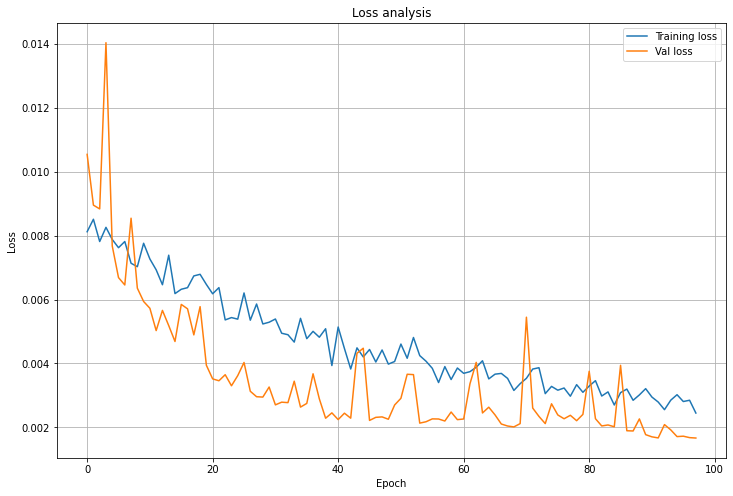

In [17]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'][2:], label = "Training loss")
plt.plot(hist.history['val_loss'][2:], label = "Val loss")
plt.title("Loss analysis")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid("both")

## Model Evaluation

In [18]:
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)

train_pred = scaler.inverse_transform(train_pred)
val_pred = scaler.inverse_transform(val_pred)

train_set_temp = scaler.inverse_transform(train_set)
val_set_temp = scaler.inverse_transform(val_set)

1/1 [==============================] - 0s 49ms/step


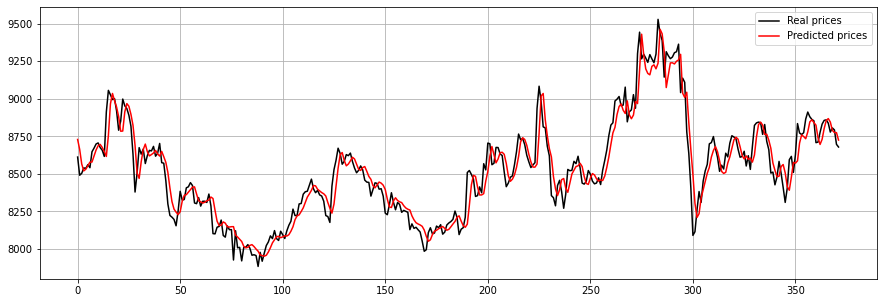

In [19]:
x1 = train_set_temp[-(train_pred.shape[0]):]
plt.figure(figsize = (15,5))
plt.plot(x1, color = 'black', label = 'Real prices')
plt.plot(train_pred, color='red', label='Predicted prices')
plt.legend()
plt.grid()

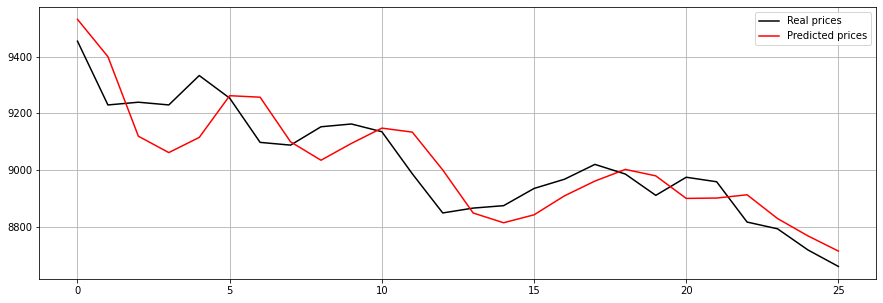

In [20]:
x2 = val_set_temp[-(val_pred.shape[0]):]
plt.figure(figsize = (15,5))
plt.plot(x2, color = 'black', label = 'Real prices')
plt.plot(val_pred, color='red', label='Predicted prices')
plt.legend()
plt.grid()

## Prediction

In [21]:
train_dataset = pd.concat([df_train, df_val])

train_values = train_dataset.values

In [22]:
def prediction(timestep, inp):
  input = inp[-(timestep+pred_days):]

  input = scaler.fit_transform(np.array(input).reshape(-1,1))

  x_test = []
  for i in range(timestep, input.shape[0]):
    x_test.append(input[(i - timestep) : i , 0])
  x_test = np.array(x_test)

  x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

  return x_test, scaler

In [23]:
x_test, scaler = prediction(timestep, train_values)
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

2/2 [==============================] - 0s 31ms/step


In [25]:
# date_list = [today + datetime.timedelta(days=x) for x in range(pred_days)]
# pred_df = pd.DataFrame(data=y_pred, index=date_list)

# plt.figure(figsize=(20,5))
# plt.plot(df[-(timestep):], color='black', label='Real Price(Till today)')
# plt.plot(pred_df, color='red', label=f'Predictions for next {pred_days} days')
# plt.grid()
# plt.legend()
# plt.title(f"{comp_symbol} Stock")
# plt.xlabel("Date")
# plt.ylabel("Rs per share")

Text(0, 0.5, 'Rs per Share')

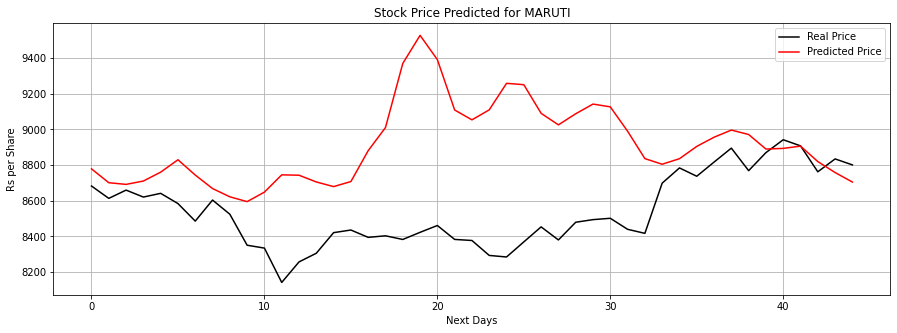

In [30]:
plt.figure(figsize=(15,5))

plt.plot(df_test.values, color='black', label='Real Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.grid()
plt.legend()
plt.title(f"Stock Price Predicted for {comp_symbol}")
plt.xlabel("Next Days")
plt.ylabel("Rs per Share")